In [0]:
# Change directory to VSCode workspace root so that relative path loads work correctly. Turn this addition off with the DataScience.changeDirOnImportExport setting
import os
try:
	os.chdir(os.path.join(os.getcwd(), '..\..\tcc'))
	print(os.getcwd())
except:
	pass


In [1]:
#! /usr/bin/env python3
# -*- encoding: utf-8 -*-
import pandas as pd
import numpy as np
"""Pandas Data"""
data = pd.read_json('final.json')


In [2]:
df = pd.DataFrame(data, columns = ['quantidadeDownloads',      
                                   'score',
                                   'quantidadeClassificacoes',
                                   'quantidadeComentarios',
                                   'preco',
                                   'free',
                                   'offersIap',
                                   'versaoAndroid',
                                   'desenvolvedor',
                                   'genero',
                                   'adSupported'])

'''Inicio das binarizações'''
dfVersao = pd.get_dummies(df.versaoAndroid, prefix='Versao')
dfGenero = pd.get_dummies(df['genero'])
dfFree = pd.get_dummies(df['free']).iloc[:, 1:]
dfOffersIap = pd.get_dummies(df['offersIap']).iloc[:, 1:]
dfadSupported = pd.get_dummies(df['adSupported']).iloc[:, 1:]
dfDesenvolvedor = pd.get_dummies(df['desenvolvedor'])
'''End das binarizações'''


'End das binarizações'

In [3]:
'''Drop table'''
df = df.drop('desenvolvedor',axis=1)
df = df.drop('versaoAndroid',axis=1)
df = df.drop('free',axis=1)
df = df.drop('offersIap',axis=1)
df = df.drop('adSupported',axis=1)
df = df.drop('genero', axis=1)
'''End Drop table'''


'End Drop table'

In [4]:
dfQuantidadedeDownload=(df['quantidadeDownloads']-df['quantidadeDownloads'].min())/(df['quantidadeDownloads'].max()-df['quantidadeDownloads'].min())
dfQuantidadeClassificacoes=(df['quantidadeClassificacoes']-df['quantidadeClassificacoes'].min())/(df['quantidadeClassificacoes'].max()-df['quantidadeClassificacoes'].min())
dfQuantidadeComentarios=(df['quantidadeComentarios']-df['quantidadeComentarios'].min())/(df['quantidadeComentarios'].max()-df['quantidadeComentarios'].min())
dfPreco = (df['preco']-df['preco'].min())/(df['preco'].max()-df['preco'].min())
normalized_df = pd.concat([dfQuantidadedeDownload,dfQuantidadeClassificacoes,dfQuantidadeComentarios,dfPreco,df], axis=1)
print(normalized_df)


       quantidadeDownloads  quantidadeClassificacoes  quantidadeComentarios  \
0             1.999998e-03              1.762668e-03           1.916890e-03   
1             9.999980e-04              5.777183e-04           9.623728e-04   
2             2.000000e-02              2.978080e-02           3.606967e-02   
3             9.999998e-03              3.703958e-03           5.390303e-03   
4             9.999800e-05              1.726594e-05           2.284027e-05   
5             1.999998e-03              1.340988e-04           1.692476e-04   
6             2.000000e-02              3.258794e-02           2.759291e-02   
7             9.999980e-04              4.199537e-04           7.304655e-04   
8             2.000000e-02              1.093859e-02           7.768107e-03   
9             1.999998e-03              1.221300e-03           1.371624e-03   
10            2.000000e-02              7.619320e-03           6.268505e-03   
11            2.000000e-02              2.502788e-02

In [5]:
'''Concatenando todos os itens da tabela para regressão'''
jogosAndroid = pd.concat([dfVersao,dfDesenvolvedor,dfFree,dfOffersIap,dfadSupported,dfGenero,normalized_df], axis=1)
print(jogosAndroid)
"""End concatenação"""

       Versao_1.0  Versao_1.1  Versao_1.5  Versao_1.6  Versao_2.0  \
0               0           0           0           0           0   
1               0           0           0           0           0   
2               0           0           0           0           0   
3               0           0           0           0           0   
4               0           0           0           0           0   
5               0           0           0           0           0   
6               0           0           0           0           0   
7               0           0           0           0           0   
8               0           0           0           0           0   
9               0           0           0           0           0   
10              0           0           0           0           0   
11              0           0           0           0           0   
12              0           0           0           0           0   
13              0           0     

'End concatenação'

In [6]:
'''Separando quantidade parecida de exemplos'''
jogosAndroidXMenorQueQuatro = jogosAndroid[jogosAndroid['score'] < 4]
jogosAndroidXMaiorQueQuatro = jogosAndroid[jogosAndroid['score'] >= 4].sample(n=300)
jogosAndroidQuatidadeProporcional = jogosAndroidXMenorQueQuatro.append(jogosAndroidXMaiorQueQuatro)
print(jogosAndroidQuatidadeProporcional)

       Versao_1.0  Versao_1.1  Versao_1.5  Versao_1.6  Versao_2.0  \
1               0           0           0           0           0   
7               0           0           0           0           0   
25              0           0           0           0           0   
40              0           0           0           0           0   
57              0           0           0           0           0   
69              0           0           0           0           0   
80              0           0           0           0           0   
83              0           0           0           0           0   
88              0           0           0           0           0   
127             0           0           0           0           0   
148             0           0           0           0           0   
153             0           0           0           0           0   
172             0           0           0           0           0   
196             0           0     

In [7]:
'''Iniciando base para classificação'''
def classifier(row):
    if row['score'] >= 4:
        return 1
    elif row['score'] < 3.5:
        return 0
    else:
        return None


In [8]:
'''Classificando'''
dfClassification =  jogosAndroid
dfClassification['classification'] = dfClassification.apply(classifier, axis=1)
'''Classificado'''

'Classificado'

In [9]:
'''Separando em quantidades iguais'''
dfClassificationGoodSample = dfClassification[dfClassification['classification'] == 1].sample(n=753)
dfClassificationBadSample = dfClassification[dfClassification['classification'] == 0]
dfClassification = dfClassificationBadSample.append(dfClassificationGoodSample)
dfClassification.drop('score', axis=1)
print(dfClassification)


       Versao_1.0  Versao_1.1  Versao_1.5  Versao_1.6  Versao_2.0  \
1               0           0           0           0           0   
25              0           0           0           0           0   
212             0           0           0           1           0   
271             0           0           0           0           0   
284             0           0           0           0           0   
287             0           0           0           0           0   
327             0           0           0           0           0   
406             0           0           0           0           0   
416             0           0           0           0           0   
441             0           0           0           0           0   
490             0           0           0           0           0   
594             0           0           0           0           0   
596             0           0           0           0           0   
598             0           0     

In [10]:
'''Separando Conjunto de Classificação X e Y'''
dfClassificationY = dfClassification['classification']
dfClassificationX = dfClassification.drop('classification', axis=1)


In [11]:
'''Separando Conjunto de Regressão Proporcional X e Y'''
jogosAndroidQuatidadeProporcionalY = jogosAndroidQuatidadeProporcional['score']
jogosAndroidQuatidadeProporcionalX = jogosAndroidQuatidadeProporcional.drop('score', axis=1)



In [12]:
'''Sepraando Conjunto de Regressão com TUDO X e Y'''
jogosAndroidY = jogosAndroid['score']
jogosAndroidX = jogosAndroid.drop('score', axis=1)


In [13]:
'''Carregando os Algoritmos'''
from sklearn.model_selection import KFold
from sklearn.model_selection._validation import cross_val_score, cross_val_predict
from sklearn.model_selection import train_test_split as tts
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn import utils
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools


In [14]:
'''Algoritimo de Regressão'''
def regression(regression):
    scores = cross_val_score(regression, jogosAndroidQuatidadeProporcionalX, jogosAndroidQuatidadeProporcionalY, cv=10)
    predict = cross_val_predict(regression, jogosAndroidQuatidadeProporcionalX, jogosAndroidQuatidadeProporcionalY, cv=10)
    mse = cross_val_score(regression, jogosAndroidQuatidadeProporcionalX, jogosAndroidQuatidadeProporcionalY, cv=10,scoring='neg_mean_squared_error')
    mae = cross_val_score(regression, jogosAndroidQuatidadeProporcionalX, jogosAndroidQuatidadeProporcionalY, cv=10,scoring='neg_mean_absolute_error')
    print ('Predict: ', predict)
    print('max: ', max(predict))
    print('min: ', min(predict))
    print('R2: ', scores.mean())
    print('MAE: ', mae.mean())
    print('MSE: ', mse.mean())
    print('RMSE: ', np.square(mse.mean()))
    plt.scatter(jogosAndroidQuatidadeProporcionalY, predict)


In [15]:
'''Algoritimo de Classificação'''
def classifier(classifier):
    scores = cross_val_score(classifier, dfClassificationX, dfClassificationY, cv=10)
    f1 = cross_val_score(classifier, dfClassificationX, dfClassificationY, cv=10, scoring='f1')
    precision = cross_val_score(classifier, dfClassificationX, dfClassificationY, cv=10, scoring='precision')
    recall = cross_val_score(classifier, dfClassificationX, dfClassificationY, cv=10, scoring='recall')
    predictions = cross_val_predict(classifier, dfClassificationX, dfClassificationY, cv=10)
    print ("Accuracy:", scores.mean())
    print ('F1:', f1.mean())
    print ('Precision', precision.mean())
    print ('Recall', recall.mean())
    cnf_matrix = confusion_matrix(dfClassificationY,predictions)
    plt.scatter(dfClassificationY, predictions)
    plt.figure()
    plot_confusion_matrix(cnf_matrix, normalize=True,
                        title='Normalized confusion matrix')

    plt.show()


In [16]:
'''Matriz de confusão'''
def plot_confusion_matrix(cm,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


Predict:  [   6.03467193    5.78871281  -38.66269928 ...    3.76012784 -494.09782854
 -494.04273579]
max:  818148.8097493444
min:  -15219.59032552071
R2:  -4720268238.35395
MAE:  -442.28574954378746
MSE:  -253004510.72206187
RMSE:  6.401128244570992e+16


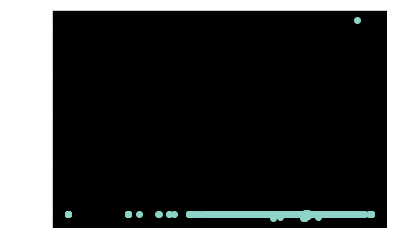

In [17]:
'''Iniciando Algoritimos de Regressão'''
lm = LinearRegression()
regression(lm)

Predict:  [3.7188978 3.945048  3.937355  ... 3.8477175 4.8183393 3.9827573]
max:  5.0
min:  0.0
R2:  -0.9360408256495951
MAE:  -0.404141645833026
MSE:  -0.38825322750296964
RMSE:  0.1507405686664727


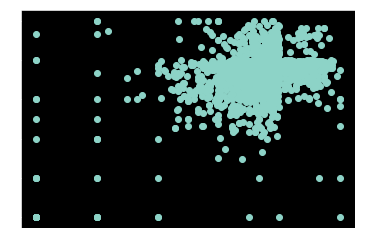

In [18]:
neighbors = 1
knn = KNeighborsRegressor(n_neighbors=neighbors)
regression(knn)


Predict:  [3.87793497 4.23054857 3.79137227 ... 3.84840383 4.25516637 3.86534437]
max:  4.651716866666667
min:  0.0
R2:  -0.777811633996496
MAE:  -0.35138392529503004
MSE:  -0.27095781806365565
RMSE:  0.07341813916981711


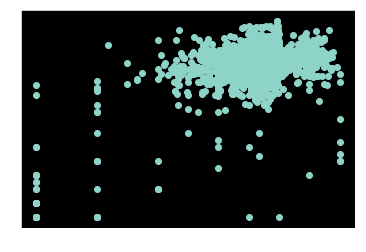

In [19]:
neighbors = 3
knn = KNeighborsRegressor(n_neighbors=neighbors)
regression(knn)


Predict:  [4.1778146  4.17985174 3.6731365  ... 3.80119336 4.00399598 3.74637088]
max:  4.50105972
min:  0.0
R2:  -0.7982498048930147
MAE:  -0.3360561897937296
MSE:  -0.2509796225071593
RMSE:  0.06299077091383617


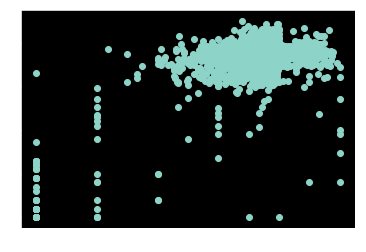

In [20]:
neighbors = 5
knn = KNeighborsRegressor(n_neighbors=neighbors)
regression(knn)


Predict:  [4.14225581 4.14948881 3.67262781 ... 3.93091917 4.00016213 3.72451984]
max:  4.370193928571427
min:  0.0
R2:  -0.7944197733995149
MAE:  -0.33123022757335385
MSE:  -0.25241215542387635
RMSE:  0.0637118962057271


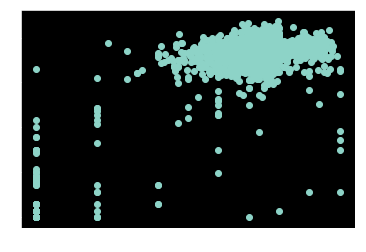

In [21]:
neighbors = 7
knn = KNeighborsRegressor(n_neighbors=neighbors)
regression(knn)


Predict:  [4.19524624 4.05496981 3.55727727 ... 3.82197672 3.96819751 3.7562643 ]
max:  4.374757866666666
min:  0.0
R2:  -0.8174945041747355
MAE:  -0.3297674596244858
MSE:  -0.2537680882785679
RMSE:  0.06439824262855903


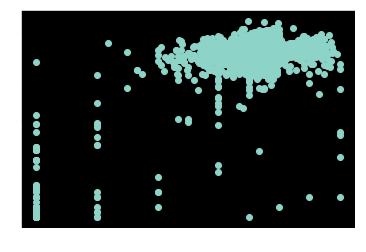

In [22]:
neighbors = 9
knn = KNeighborsRegressor(n_neighbors=neighbors)
regression(knn)


Predict:  [4.40335674 4.40335674 4.40335674 ... 3.80782998 3.80782998 3.80782998]
max:  4.588762174999999
min:  0.0
R2:  -0.5039261323774525
MAE:  -0.3202284078532497
MSE:  -0.2310712753051746
RMSE:  0.05339393427115979


'Finalizando Algoritimos de Regressão'

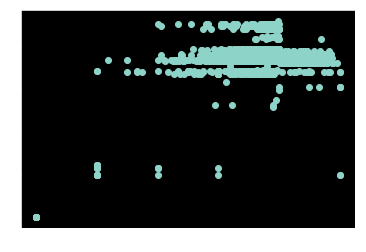

In [23]:
dtr = DecisionTreeRegressor(max_depth=5)
regression(dtr)
'''Finalizando Algoritimos de Regressão'''


Accuracy: 1.0
F1: 1.0
Precision 1.0
Recall 1.0
Normalized confusion matrix
[[1. 0.]
 [0. 1.]]


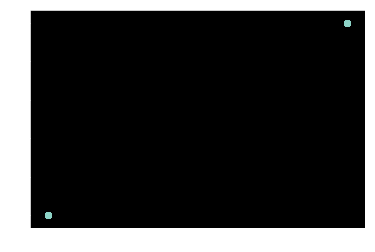

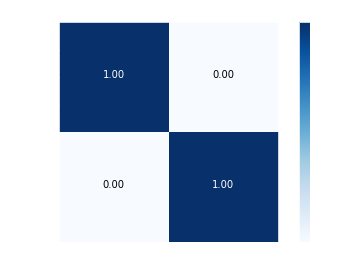

In [24]:
'''Iniciando Algoritimos de Classficação'''
dtc = DecisionTreeClassifier(random_state=0)
classifier(dtc)

Accuracy: 0.7452017543859649
F1: 0.7440411572115149
Precision 0.7645287086064129
Recall 0.7329298245614035
Normalized confusion matrix
[[0.75697211 0.24302789]
 [0.26693227 0.73306773]]


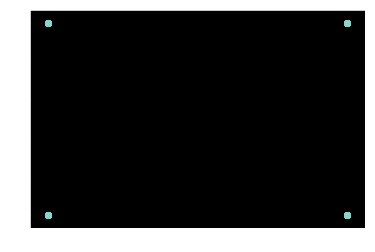

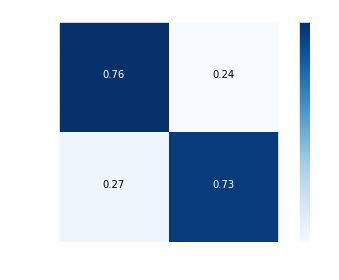

In [25]:
neighbors2 = 1
neigh = KNeighborsClassifier(n_neighbors=neighbors2)
classifier(neigh)


Accuracy: 0.7478684210526315
F1: 0.7501574700270013
Precision 0.763216945395672
Recall 0.750280701754386
Normalized confusion matrix
[[0.74501992 0.25498008]
 [0.24966799 0.75033201]]


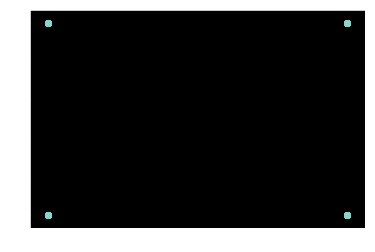

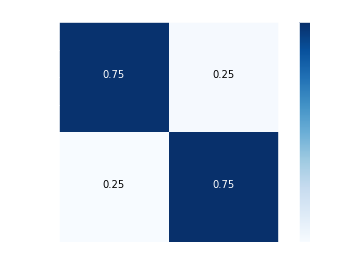

In [26]:
neighbors2 = 3
neigh = KNeighborsClassifier(n_neighbors=neighbors2)
classifier(neigh)


Accuracy: 0.7451666666666665
F1: 0.7490162317097415
Precision 0.7585388740169485
Recall 0.7514912280701754
Normalized confusion matrix
[[0.73837981 0.26162019]
 [0.24833997 0.75166003]]


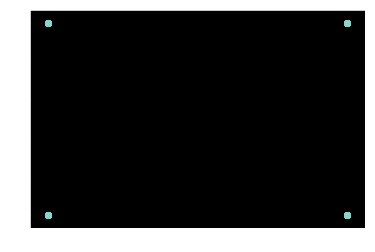

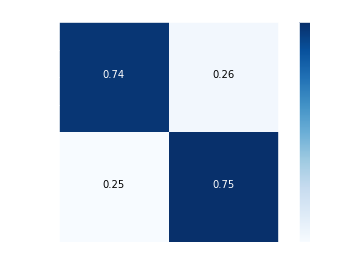

In [27]:
neighbors2 = 5
neigh = KNeighborsClassifier(n_neighbors=neighbors2)
classifier(neigh)


Accuracy: 0.7504824561403509
F1: 0.7553706676129592
Precision 0.7602729913737497
Recall 0.7595438596491227
Normalized confusion matrix
[[0.74103586 0.25896414]
 [0.24037185 0.75962815]]


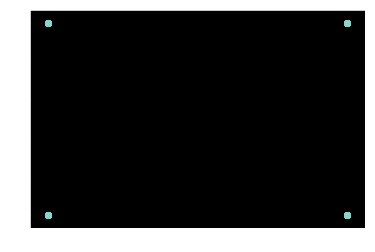

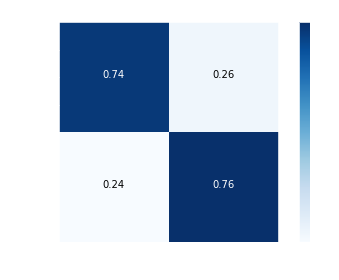

In [28]:
neighbors2 = 7
neigh = KNeighborsClassifier(n_neighbors=neighbors2)
classifier(neigh)


Accuracy: 0.7491666666666668
F1: 0.7547365014991118
Precision 0.7585389592224575
Recall 0.7622105263157894
Normalized confusion matrix
[[0.73572377 0.26427623]
 [0.2377158  0.7622842 ]]


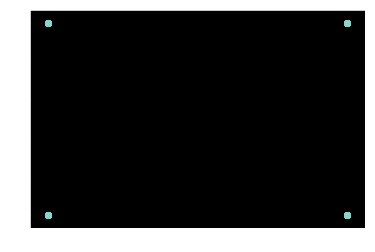

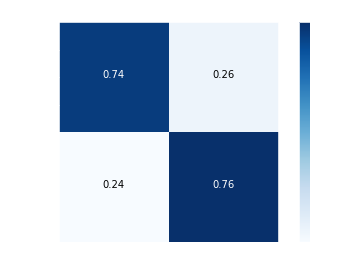

In [29]:
neighbors2 = 9
neigh = KNeighborsClassifier(n_neighbors=neighbors2)
classifier(neigh)


C:\Users\Daniel\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Daniel\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Daniel\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Daniel\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Daniel\AppData\Local\Programs\Python\Python37\l

Accuracy: 0.6628157894736841
F1: 0.7451680980422181
Precision 0.6199768089310795
Recall 0.953561403508772
Normalized confusion matrix
[[0.37184595 0.62815405]
 [0.04648074 0.95351926]]


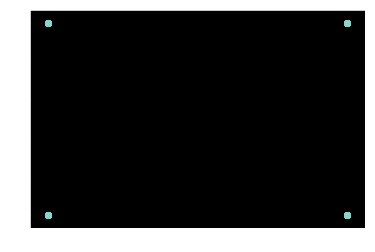

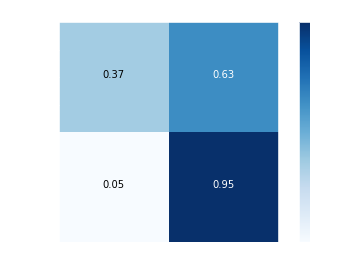

In [30]:
lr = LogisticRegression()
classifier(lr)


Accuracy: 0.5797456140350877
F1: 0.2990508298543682
Precision 0.9007739938080496
Recall 0.1806842105263158
Normalized confusion matrix
[[0.97875166 0.02124834]
 [0.81938911 0.18061089]]


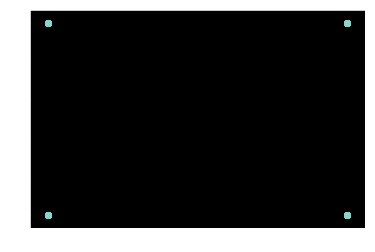

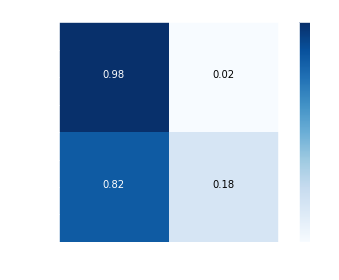

'Finalizando Algoritimos de Classficação'

In [31]:
gnb = GaussianNB()
classifier(gnb)
'''Finalizando Algoritimos de Classficação'''